In [2]:
import os
import detect_ai as dai
from IPython.display import display, Image

# 1 Load Model

## Single Model

To load a modification detection model, use the `start_model(model_path)` function, where `model_path` is the string path to the model.

### Binary

In [3]:
model_path = os.path.join('..', 'models', 'modifying', 'binary', 'beauty_gan', 'inception_v3', 'inception_v3.keras')
binary_detector = dai.mod_start_model(model_path=model_path)

[ModifyingTiming] init:inception_v3.keras: 1.231s
..\models\modifying\binary\beauty_gan\inception_v3\inception_v3.keras
Feature Extraction: deep features.
Classifier Parameters: {'model type': 'Sequential', 'input shape': (128, 128, 3), 'output shape': 1, 'class indices': {0: 'no modification', 1: 'modification'}, 'model parameters': {'num_layers': 8, 'layer_0': {'name': 'inception_v3', 'num_sublayers': 311}, 'layer_1': {'name': 'gaussian_noise_6'}, 'layer_2': {'name': 'global_average_pooling2d_3'}, 'layer_3': {'name': 'dense_3', 'units': 512, 'activation': 'relu', 'kernel_regularizer': None}, 'layer_4': {'name': 'batch_normalization_97', 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001}, 'layer_5': {'name': 'gaussian_noise_7'}, 'layer_6': {'name': 'dropout_3', 'rate': 0.25}, 'layer_7': {'name': 'predictions', 'units': 1, 'activation': 'sigmoid', 'kernel_regularizer': None}}}


### Multiclass

In [4]:
model_path = os.path.join('..', 'models', 'modifying', 'multiclass', 'tool', 'eff_net_b3', 'eff_net_b3.keras')
multiclass_detector = dai.mod_start_model(model_path=model_path)

[ModifyingTiming] init:eff_net_b3.keras: 1.250s
..\models\modifying\multiclass\tool\eff_net_b3\eff_net_b3.keras
Feature Extraction: deep features.
Classifier Parameters: {'model type': 'Sequential', 'input shape': (128, 128, 3), 'output shape': 5, 'class indices': {0: 'original', 1: 'bald_gan', 2: 'beauty_gan', 3: 'qwen', 4: 'pilgram'}, 'model parameters': {'num_layers': 10, 'layer_0': {'name': 'efficientnetb3', 'num_sublayers': 385}, 'layer_1': {'name': 'gaussian_noise_16'}, 'layer_2': {'name': 'global_average_pooling2d_8'}, 'layer_3': {'name': 'dense_13', 'units': 512, 'activation': 'relu', 'kernel_regularizer': None}, 'layer_4': {'name': 'dense_14', 'units': 128, 'activation': 'relu', 'kernel_regularizer': None}, 'layer_5': {'name': 'dense_15', 'units': 64, 'activation': 'relu', 'kernel_regularizer': None}, 'layer_6': {'name': 'batch_normalization_102', 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001}, 'layer_7': {'name': 'gaussian_noise_17'}, 'layer_8': {'name': 'dropout_8', 'rate':

## Ensemble Model

To load a modification detection ensemble model, use the `start_ensemble(from_file)` function, where `from_file` is the string path to the ensemble.

In [5]:
ensemble_detector = dai.mod_start_ensemble(ensemble_info=dai.mod_ens_dict)

[ModifyingTiming] init:eff_net_b3.keras: 0.937s
[ModifyingTiming] init:eff_net_b3.keras: 0.898s
[ModifyingTiming] init:effnetv2s.keras: 1.757s
Parameters of model '..\models\modifying\binary\makeup_wild\eff_net_b3\eff_net_b3.keras'
    Feature Extraction: deep features.
    Classifier Parameters: {'model type': 'Sequential', 'input shape': (256, 256, 3), 'output shape': 1, 'class indices': {0: 'no makeup', 1: 'makeup'}, 'model parameters': {'num_layers': 8, 'layer_0': {'name': 'efficientnetb3', 'num_sublayers': 385}, 'layer_1': {'name': 'gaussian_noise'}, 'layer_2': {'name': 'global_average_pooling2d'}, 'layer_3': {'name': 'dense', 'units': 512, 'activation': 'relu', 'kernel_regularizer': None}, 'layer_4': {'name': 'batch_normalization', 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001}, 'layer_5': {'name': 'gaussian_noise_1'}, 'layer_6': {'name': 'dropout', 'rate': 0.25}, 'layer_7': {'name': 'predictions', 'units': 1, 'activation': 'sigmoid', 'kernel_regularizer': None}}}

Parameters of

# 2 Image Definition

The path to the image is specified entirely by a string.

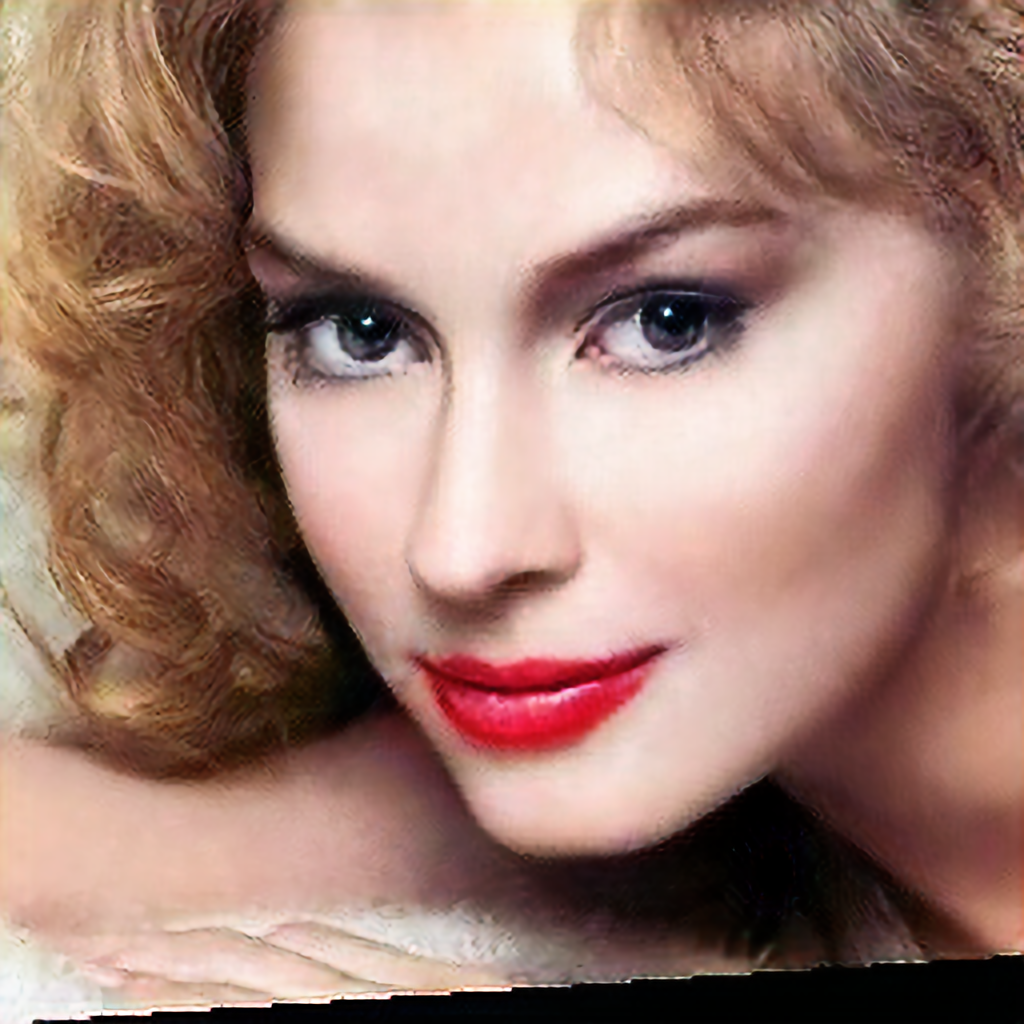

In [6]:
img_path = os.path.join('..', 'datasets', 'modifying', 'beauty_gan', 'modification', 'face_0000000044_XMY-014.png')
display(Image(filename=img_path, width=600, height=300))

# 3 Run Model

To run the detector (or ensemble), use the internal function `run(image_path)`, where `image_path` is the path to the image.

## Binary

In [7]:
result = binary_detector.run(img_path=img_path)
result

[ModifyingTiming] prepare:plain: 0.115s
[ModifyingTiming] prepare:total: 0.115s
[ModifyingTiming] run:predict: 1.175s
[ModifyingTiming] run:total: 1.290s


{'img_name': '..\\datasets\\modifying\\beauty_gan\\modification\\face_0000000044_XMY-014.png',
 'label': 'modification',
 'probability': 1.0}

## Multiclass

In [8]:
result = multiclass_detector.run(img_path=img_path)
result

[ModifyingTiming] prepare:plain: 0.103s
[ModifyingTiming] prepare:total: 0.103s
[ModifyingTiming] run:predict: 1.719s
[ModifyingTiming] run:total: 1.822s


{'img_name': '..\\datasets\\modifying\\beauty_gan\\modification\\face_0000000044_XMY-014.png',
 'label': 'beauty_gan',
 'probability': 0.99982}

## Ensemble

In [10]:
result = ensemble_detector.run(img_path=img_path)
result

[ModifyingTiming] prepare:plain: 0.097s
[ModifyingTiming] prepare:total: 0.097s
[ModifyingTiming] prepare:plain: 0.103s
[ModifyingTiming] prepare:total: 0.103s
[ModifyingTiming] prepare:plain: 0.112s
[ModifyingTiming] prepare:total: 0.112s


{'img_name': '..\\datasets\\modifying\\beauty_gan\\modification\\face_0000000044_XMY-014.png',
 'label': 'beautification',
 'probability': 0.9889}